# Continuing work with dictionaries and web APIs

## The short and right way to do it...

In [3]:
# %load http://bit.ly/pythoncharmersurls
OpenWeatherMapApiKey="d1741b0c4ca70aeb629424a1ddcf28a1"
url="https://api.openweathermap.org/data/2.5/weather?q={city_name},{country_code}"
postgresqlTrainingDatabase="gis.ceebzpnip62q.ap-southeast-2.rds.amazonaws.com:5432/training"


In [4]:
url = 'https://api.openweathermap.org/data/2.5/weather?'

In [5]:
params = {} # creat empty dictionary

In [53]:
# Creating dictionary with values in the form of key:value

params = {
    'q' : 'Melbourne,AU',
    'appid' : OpenWeatherMapApiKey
}

In [54]:
params

{'q': 'Melbourne,AU', 'appid': 'd1741b0c4ca70aeb629424a1ddcf28a1'}

In [55]:
# to pull out a certain value we do this: params['key'], for example:

params['q']


'Melbourne,AU'

In [56]:
import requests
response = requests.get(url, params)

In [57]:
response.json()

{'coord': {'lon': 144.96, 'lat': -37.81},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 293.49,
  'pressure': 1014,
  'humidity': 64,
  'temp_min': 293.15,
  'temp_max': 294.15},
 'visibility': 10000,
 'wind': {'speed': 9.8, 'deg': 10, 'gust': 15.4},
 'clouds': {'all': 75},
 'dt': 1539643080,
 'sys': {'type': 1,
  'id': 8201,
  'message': 0.0086,
  'country': 'AU',
  'sunrise': 1539545658,
  'sunset': 1539592678},
 'id': 2158177,
 'name': 'Melbourne',
 'cod': 200}

In [58]:
weather = response.json()

In [59]:
weather['main']['temp']

293.49

######  - Change the cuntry + city and the units

In [60]:
params['q'] = 'Alexandria,EG'

In [61]:
response = requests.get(url, params)

In [62]:
weather = response.json()

In [63]:
weather['main']['temp']

294.12

In [66]:
params['units'] = 'metric'

In [67]:
params

{'q': 'Alexandria,EG',
 'appid': 'd1741b0c4ca70aeb629424a1ddcf28a1',
 'units': 'metric'}

In [68]:
response = requests.get(url, params)

In [69]:
weather = response.json()

In [70]:
weather['main']['temp']

21.38

### Exercise: turning this into a `get temperature` function

In [103]:
def get_temperature(city):
    """
    Get the current temperature for t a given city
    
    City should be in the form of city name, country code
    """
    params['q'] = city
    response = requests.get(url, params)
    weather = response.json()
    return weather['main']['temp']

In [104]:
places = ['Melbourne,AU', 'Brisbane,AU', 'Paris,FR']
weather = []

for p in places:
    temp = get_temperature(p)
    weather.append(temp)
    
weather

[20.34, 21.99, 15.71]

###### Storing the weather values in a dictionary instead. 

In [106]:
cities = ['Melbourne,AU', 'Brisbane,AU', 'Paris,FR']
weather_dict = {}

for city in cities:
    temp = get_temperature(city)
    weather_dict[city] = temp
    
weather_dict

{'Melbourne,AU': 20.34, 'Brisbane,AU': 21.98, 'Paris,FR': 15.57}

What happens when you get a rubbish data instead of good data? (real world)

In [109]:
cities_r = ['Sidney', 'Melborne,AU', 'Hobart,AUS', 'Manchester,UK']

for city in cities_r:
    print(city, get_temperature(city))

Sidney 15.7


KeyError: 'main'

We want to get the worked data and skip the errors

In Python Exception handeling is desigend to help with bad data, NOT BAD CODE.

In [110]:
for city in cities_r:
    try:    # a bit dangerous
        print(city, get_temperature(city))
    except:
        print('Error with', city)

Sidney 15.71
Error with Melborne,AU
Hobart,AUS 18
Manchester,UK 9.99


In [112]:
for city in cities_r:
    try:    # a bit dangerous
        print(city, get_temperature(city))
    except KeyError as e:
        print('Error with', city)
        print(e)

Sidney 15.97
Error with Melborne,AU
'main'
Hobart,AUS 18
Manchester,UK 9.99


### Exercise: Update the function to handle errors


In [115]:
import warnings
warnings.warn("Couldn't process" + city)

C:\Users\ABD01F\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Couldn't processManchester,UK
  


In [118]:
def get_temperature(city):
    """
    Get the current temperature for t a given city
    
    City should be in the form of city name, country code
    """
    params['q'] = city
    response = requests.get(url, params)
    weather = response.json()
    try:
        return weather['main']['temp']
    except KeyError:
        warnings.warn("Couldn't process " + city)
        return None
        

In [124]:
cities_r = ['Sidney', 'Melborne,AU', 'Hobart,AUS', 'Manchester,UK']
weather ={}

for city in cities_r:
    weather[city] = get_temperature(city)
weather

C:\Users\ABD01F\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Couldn't process Melborne,AU
  del sys.path[0]


{'Sidney': 14.4, 'Melborne,AU': None, 'Hobart,AUS': 19, 'Manchester,UK': 10.3}

# ***Pandas***

In [1]:
import pandas as pd

In [128]:
olympics = pd.read_csv('Data/olympics2012.csv')

In [129]:
olympics

,Country,Gold,Silver,Bronze
0,Afghanistan,0,0,1
1,Albania,0,0,0
2,Algeria,1,0,0
3,American Virgin Islands,0,0,0
4,Andorra,0,0,0
5,Angola,0,0,0
6,Antigua and Barbuda,0,0,0
7,Argentina,1,1,2
8,Armenia,0,1,2
9,Aruba,0,0,0


In [130]:
olympics.dtypes

Country    object
Gold        int64
Silver      int64
Bronze      int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002028CA0AD30>,
      dtype=object)

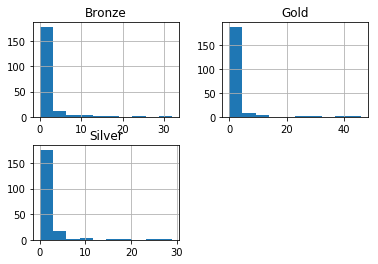

In [139]:
%matplotlib inline
olympics.hist()

In [134]:
olympics['Gold']

0       0
1       0
2       1
3       0
4       0
5       0
6       0
7       1
8       0
9       0
10      7
11      0
12      2
13      1
14      0
15      0
16      0
17      2
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      3
27      0
28      0
29      0
       ..
174     0
175     0
176     0
177     1
178     2
179     0
180     0
181     0
182     0
183     0
184     0
185     0
186     0
187     1
188     1
189     2
190     0
191     0
192     1
193     6
194     0
195    46
196     0
197     1
198     0
199     1
200     0
201     0
202     0
203     0
Name: Gold, Length: 204, dtype: int64

In [141]:
olympics = olympics.set_index('Country')

In [142]:
olympics['Gold']

Country
Afghanistan                  0
Albania                      0
Algeria                      1
American Virgin Islands      0
Andorra                      0
Angola                       0
Antigua and Barbuda          0
Argentina                    1
Armenia                      0
Aruba                        0
Australia                    7
Austria                      0
Azerbaijan                   2
Bahamas                      1
Bahrain                      0
Bangladesh                   0
Barbados                     0
Belarus                      2
Belgium                      0
Belize                       0
Benin                        0
Bermuda                      0
Bhutan                       0
Bolivia                      0
Bosnia and Herzegovina       0
Botswana                     0
Brazil                       3
British Virgin Islands       0
Brunei Darussalam            0
Bulgaria                     0
                            ..
Sudan                        0


### Exercise: Totalling the number of medals

Add gold and silver medals together.

Calculate the totl # of medals won for each country!

creat a new column for the total number of medals in olympics df

to test, try the following line:
        `olympics('Total').nlargest(10).plot(kind='bar')`

In [147]:
olympics['Total'] = olympics['Gold'] + olympics['Silver'] + olympics['Bronze']

In [148]:
olympics

,Gold,Silver,Bronze,Total
Country,,,,
Afghanistan,0,0,1,1
Albania,0,0,0,0
Algeria,1,0,0,1
American Virgin Islands,0,0,0,0
Andorra,0,0,0,0
Angola,0,0,0,0
Antigua and Barbuda,0,0,0,0
Argentina,1,1,2,4
Armenia,0,1,2,3


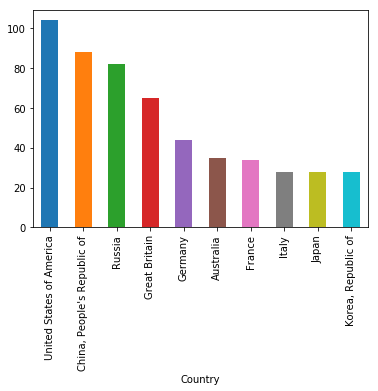

In [150]:
olympics['Total'].nlargest(10).plot(kind='bar')

In [163]:
olympics.sum()

Gold      302
Silver    294
Bronze    356
Total     952
dtype: int64

In [166]:
population = pd.read_csv('Data/country_populations_by_year.csv')

In [167]:
population = population.set_index('Country Name')

### Exercise: countries won the most medals per person



In [168]:
olympics['Number of medals per person'] = olympics['Total'] / population['2012']

In [169]:
olympics

,Gold,Silver,Bronze,Total,Number of medals per person
Country,,,,,
Afghanistan,0,0,1,1,3.257652e-08
Albania,0,0,0,0,0.000000e+00
Algeria,1,0,0,1,2.661992e-08
American Virgin Islands,0,0,0,0,NaN
Andorra,0,0,0,0,0.000000e+00
Angola,0,0,0,0,0.000000e+00
Antigua and Barbuda,0,0,0,0,0.000000e+00
Argentina,1,1,2,4,9.501924e-08
Armenia,0,1,2,3,1.040972e-06


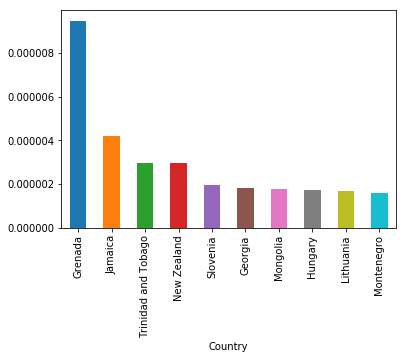

In [170]:
olympics['Number of medals per person'].nlargest(10).plot(kind = 'bar')

In [177]:
olympics.index.difference(population.index)  # indeces which are in olympics and not in poplutaion

Index(['American Virgin Islands', 'Bahamas', 'Burma (Myanmar)', 'Cape Verde',
       'China, People's Republic of', 'Congo',
       'Congo, the Democratic Republic of the', 'Cook Islands', 'DPR Korea',
       'Egypt', 'Former Yugoslav Republic of Macedonia', 'Gambia',
       'Gaza Strip/Palestine/West Bank', 'Great Britain', 'Hong Kong', 'Iran',
       'Korea, Republic of', 'Kyrgyzstan', 'Laos', 'Micronesia', 'Russia',
       'Samoa, American', 'Slovakia', 'St Kitts and Nevis', 'St Lucia',
       'St Vincent and the Grenadines', 'Syria', 'Taiwan(2)',
       'United States of America', 'Venezuela', 'Viet Nam', 'Yemen'],
      dtype='object')

In [178]:
population.index.difference(olympics.index)  # indeces which are in population and not in olympics

Index(['American Samoa', 'Arab World', 'Bahamas, The', 'Cabo Verde',
       'Caribbean small states', 'Central Europe and the Baltics',
       'Channel Islands', 'China', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Curacao', 'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)', 'Egypt, Arab Rep.',
       'Euro area', 'Europe & Central Asia',
       'Europe & Central Asia (IDA & IBRD countries)',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Faroe Islands', 'Fragile and conflict affected situations',
       'French Polynesia', 'Gambia, The', 'Gibraltar', 'Greenland',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Hong Kong SAR, China', 'IBRD only', 'IDA & IBRD total', 'IDA blend',
       'IDA only', 'IDA total', 'Iran, Islamic Rep.', 'Isle of Man',
       'Korea, Dem. People’s Rep.', 'Korea, Rep.', 'Kosovo', 'Kyrgyz Republi

In [181]:
# manually renaming or remapping the indicies
index_mapping = {
    'China': "China, People's Repuplic of",
    'United States': "United States of America",
    'United Kingdom': "Great Britain"
}

population.rename(index=index_mapping) # return a new dataframe

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Population, total",SP.POP.TOTL,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,5.771500e+04,...,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,1.052640e+05,NaN
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,1.015233e+07,...,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07,NaN
Angola,AGO,"Population, total",SP.POP.TOTL,5.643182e+06,5.753024e+06,5.866061e+06,5.980417e+06,6.093321e+06,6.203299e+06,6.309770e+06,...,2.254955e+07,2.336913e+07,2.421856e+07,2.509615e+07,2.599834e+07,2.692047e+07,2.785930e+07,2.881346e+07,2.978419e+07,NaN
Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,1.914573e+06,...,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,NaN
Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,1.964700e+04,...,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04,NaN
Arab World,ARB,"Population, total",SP.POP.TOTL,9.249093e+07,9.504450e+07,9.768229e+07,1.004111e+08,1.032399e+08,1.061750e+08,1.092306e+08,...,3.481451e+08,3.565089e+08,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08,4.144919e+08,NaN
United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,9.263400e+04,1.010780e+05,1.124720e+05,1.255660e+05,1.385290e+05,1.503620e+05,1.604810e+05,...,7.666393e+06,8.270684e+06,8.672475e+06,8.900453e+06,9.006263e+06,9.070867e+06,9.154302e+06,9.269612e+06,9.400145e+06,NaN
Argentina,ARG,"Population, total",SP.POP.TOTL,2.061908e+07,2.095308e+07,2.128768e+07,2.162184e+07,2.195393e+07,2.228339e+07,2.260875e+07,...,4.079941e+07,4.122389e+07,4.165688e+07,4.209674e+07,4.253992e+07,4.298152e+07,4.341776e+07,4.384743e+07,4.427104e+07,NaN
Armenia,ARM,"Population, total",SP.POP.TOTL,1.874120e+06,1.941491e+06,2.009526e+06,2.077575e+06,2.144998e+06,2.211316e+06,2.276031e+06,...,2.888584e+06,2.877311e+06,2.875581e+06,2.881922e+06,2.893509e+06,2.906220e+06,2.916950e+06,2.924816e+06,2.930450e+06,NaN


## Join Data Together

In [182]:
olympics.join(population)

,Gold,Silver,Bronze,Total,Number of medals per person,Country Code,Indicator Name,Indicator Code,1960,1961,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,1,1,3.257652e-08,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
Albania,0,0,0,0,0.000000e+00,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
Algeria,1,0,0,1,2.661992e-08,DZA,"Population, total",SP.POP.TOTL,11124888.0,11404859.0,...,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,41318142.0,NaN
American Virgin Islands,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,0,0,0,0,0.000000e+00,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
Angola,0,0,0,0,0.000000e+00,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
Antigua and Barbuda,0,0,0,0,0.000000e+00,ATG,"Population, total",SP.POP.TOTL,55339.0,56144.0,...,93581.0,94661.0,95719.0,96777.0,97824.0,98875.0,99923.0,100963.0,102012.0,NaN
Argentina,1,1,2,4,9.501924e-08,ARG,"Population, total",SP.POP.TOTL,20619075.0,20953077.0,...,40799407.0,41223889.0,41656879.0,42096739.0,42539925.0,42981515.0,43417765.0,43847430.0,44271041.0,NaN
Armenia,0,1,2,3,1.040972e-06,ARM,"Population, total",SP.POP.TOTL,1874120.0,1941491.0,...,2888584.0,2877311.0,2875581.0,2881922.0,2893509.0,2906220.0,2916950.0,2924816.0,2930450.0,NaN


### Exercise: Different methods of joining data togther

If you have a look at hte help for rhe `join` method, you will see there is a `how` keyword argument.
By default it is a `left` join. 

How do these joins work? 

`len(olypics.join(population, how='...'))`
    


In [183]:
len(olympics.join(population, how ='right'))

264

In [184]:
len(olympics.join(population, how ='left'))

204

In [185]:
len(olympics.join(population, how ='inner'))

172

In [186]:
len(olympics.join(population, how ='outer'))

296

In [188]:
olympics.join?

## Data indixing, selecting, and filtering

In [176]:
olympics.loc['Sweden']

Gold                           1.000000e+00
Silver                         4.000000e+00
Bronze                         3.000000e+00
Total                          8.000000e+00
Number of medals per person    8.403914e-07
Name: Sweden, dtype: float64

In [235]:
abalone = pd.read_csv(
    'Data/abalone.csv',
    index_col=0      
)

In [236]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [237]:
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [238]:
abalone.corr()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [239]:
import seaborn

C:\Users\ABD01F\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


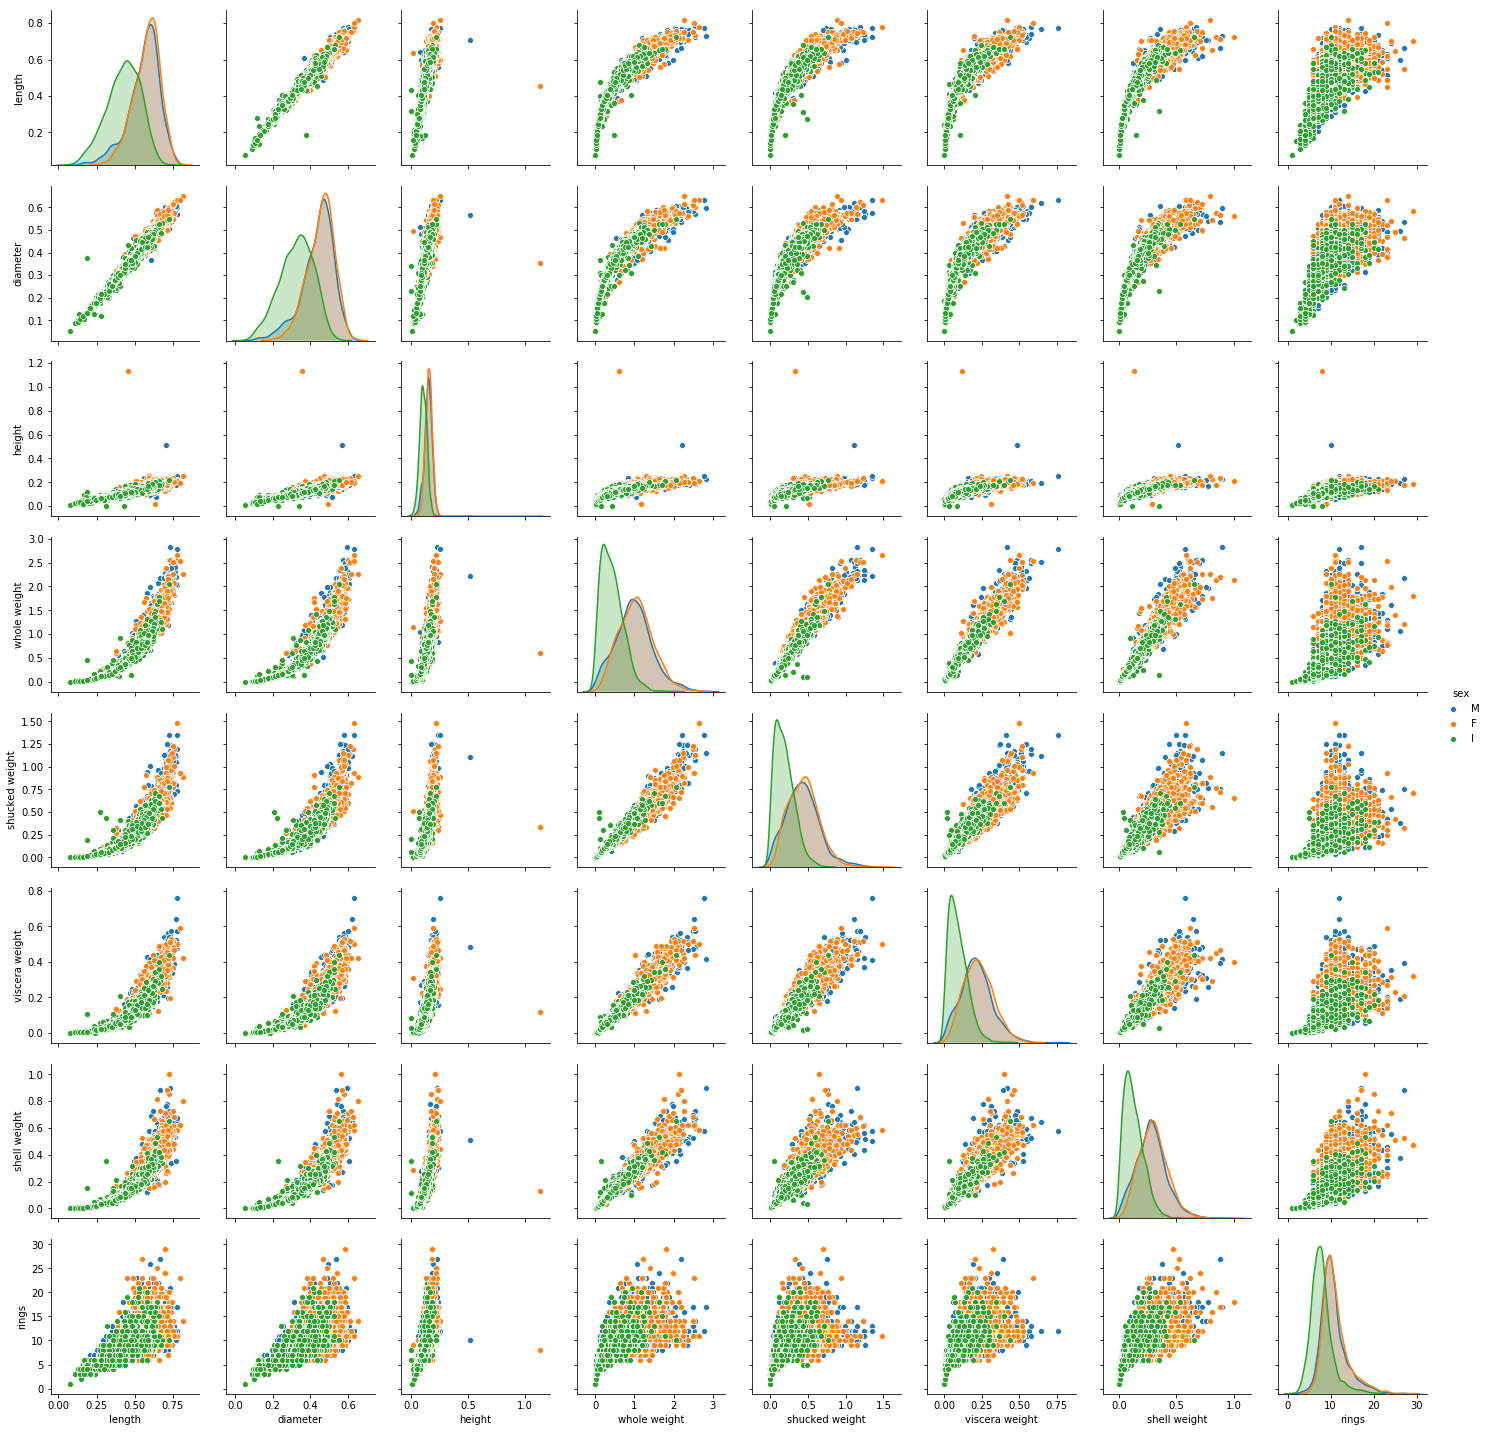

In [240]:
seaborn.pairplot(abalone, hue = 'sex')

C:\Users\ABD01F\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


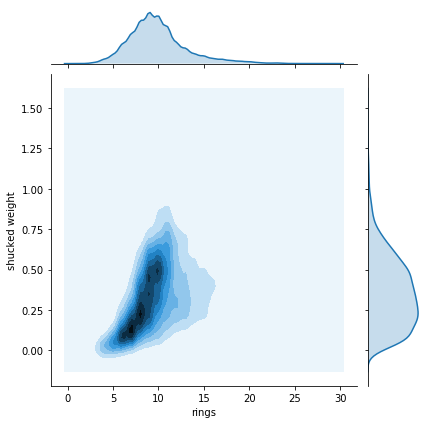

In [241]:
seaborn.jointplot(x= 'rings', y= 'shucked weight', data = abalone, kind = 'kde')

In [242]:
abalone = abalone.set_index('sex')

In [243]:
abalone.loc['I'].describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000
mean,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
std,0.108858,0.088109,0.031995,0.286275,0.128405,0.062536,0.084927,2.511554
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.360000,0.270000,0.085000,0.205500,0.090000,0.042500,0.064125,6.000000
50%,0.435000,0.335000,0.110000,0.384000,0.169750,0.080500,0.113000,8.000000
75%,0.510000,0.390000,0.130000,0.599375,0.270375,0.130000,0.178500,9.000000
max,0.725000,0.550000,0.220000,2.049500,0.773500,0.440500,0.655000,21.000000


### Exercise: indexing data to calculate statistics

You have 3 sexes on your abalone. what is the avarage (`mean`) diameter and shucked weight?

You can use `abalone.reset_index()` to unset 'sex' as index. Set the index to the number of rings. What is the avaerage shucked weight for 10 year old abalone? how about 1 15 years old?

In [244]:
abalone_F = abalone.loc['F', 'shucked weight'].mean()

In [245]:
abalone_M = abalone.loc['M', 'shucked weight'].mean()
abalone_I = abalone.loc['I', 'shucked weight'].mean()

In [246]:
abalone_F, abalone_I, abalone_M

(0.44618783473603674, 0.1910350223546944, 0.4329460078534033)

In [247]:
abalone.reset_index()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [248]:
abalone = abalone.set_index('rings')

In [251]:
abalone_10yo = abalone.loc[10, 'shucked weight'].mean()

In [252]:
abalone_15yo = abalone.loc[15, 'shucked weight'].mean()

In [253]:
abalone_10yo

0.4472168769716086

In [254]:
abalone_15yo

0.4024708737864079

In [267]:
abalone = abalone.sort_index() # to sort the indcies assendingly and rewrite the dataframe

In [268]:
abalone.loc[10:15] # index slicing in Pandas INCLUDES the final index

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
rings,,,,,,,
10,0.485,0.370,0.140,0.5725,0.2040,0.1415,0.1750
10,0.570,0.440,0.145,0.8815,0.3605,0.1955,0.2735
10,0.515,0.385,0.130,0.6230,0.2855,0.1285,0.1750
10,0.630,0.490,0.165,1.2005,0.5750,0.2730,0.2940
10,0.630,0.485,0.160,1.2430,0.6230,0.2750,0.3000
10,0.500,0.385,0.150,0.6265,0.2605,0.1665,0.1600
10,0.500,0.375,0.150,0.6360,0.2535,0.1450,0.1900
10,0.340,0.275,0.090,0.2065,0.0725,0.0430,0.0700
10,0.510,0.400,0.140,0.6515,0.2455,0.1665,0.1850


In [262]:
population.loc['Australia': 'Brazil', '1987' : '2017']  # Unique Indicies DO NOT have to be sorted

,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Australia,16263900.0,16532200.0,16814400.0,17065100.0,17284000.0,17495000.0,17667000.0,17855000.0,18072000.0,18311000.0,...,21249200.0,21691700.0,22031750.0,22340024.0,22742475.0,23145901.0,23504138.0,23850784.0,24210809.0,24598933.0
Austria,7574586.0,7585317.0,7619567.0,7677850.0,7754891.0,7840709.0,7905633.0,7936118.0,7948278.0,7959017.0,...,8321496.0,8343323.0,8363404.0,8391643.0,8429991.0,8479823.0,8546356.0,8642699.0,8736668.0,8809212.0
Azerbaijan,6893500.0,7010036.0,7126891.0,7159000.0,7271000.0,7382000.0,7495000.0,7597000.0,7685000.0,7763000.0,...,8763400.0,8947243.0,9054332.0,9173082.0,9295784.0,9416801.0,9535079.0,9649341.0,9757812.0,9862429.0
Burundi,4987736.0,5135956.0,5280024.0,5415415.0,5542048.0,5661139.0,5771398.0,5871607.0,5962058.0,6041112.0,...,8212264.0,8489031.0,8766930.0,9043508.0,9319710.0,9600186.0,9891790.0,10199270.0,10524117.0,10864245.0
Belgium,9870234.0,9901664.0,9937697.0,9967379.0,10004486.0,10045158.0,10084475.0,10115603.0,10136811.0,10156637.0,...,10709973.0,10796493.0,10895586.0,11047744.0,11128246.0,11182817.0,11209057.0,11274196.0,11331422.0,11372068.0
Benin,4535263.0,4672852.0,4820016.0,4978496.0,5149499.0,5331803.0,5521763.0,5714220.0,5905558.0,6094259.0,...,8696916.0,8944706.0,9199259.0,9460802.0,9729160.0,10004451.0,10286712.0,10575952.0,10872298.0,11175692.0
Burkina Faso,8140073.0,8356305.0,8579823.0,8811034.0,9050084.0,9297113.0,9552476.0,9816588.0,10089878.0,10372745.0,...,14689726.0,15141099.0,15605217.0,16081904.0,16571216.0,17072723.0,17585977.0,18110624.0,18646433.0,19193382.0
Bangladesh,98343809.0,100975321.0,103599232.0,106188642.0,108727432.0,111221938.0,113695139.0,116182267.0,118706871.0,121269645.0,...,148805814.0,150454708.0,152149102.0,153911916.0,155727053.0,157571292.0,159405279.0,161200886.0,162951560.0,164669751.0
Bulgaria,8971359.0,8981446.0,8876972.0,8718289.0,8632367.0,8540164.0,8472313.0,8443591.0,8406067.0,8362826.0,...,7492561.0,7444443.0,7395599.0,7348328.0,7305888.0,7265115.0,7223938.0,7177991.0,7127822.0,7075991.0


In [269]:
abalone['shucked weight'].mean()

0.3593674886282023

In [270]:
abalone['shucked weight'] > abalone['shucked weight'].mean()

rings
1     False
2     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
4     False
4     False
4     False
4     False
4     False
4     False
4     False
4     False
4     False
4     False
4     False
4     False
4     False
      ...  
21     True
21    False
21     True
21     True
21     True
21    False
21     True
21    False
22     True
22    False
22     True
22     True
22    False
22    False
23     True
23    False
23     True
23     True
23    False
23    False
23     True
23    False
23     True
24     True
24     True
25     True
26     True
27     True
27    False
29     True
Name: shucked weight, Length: 4177, dtype: bool

In [271]:
mask = abalone['shucked weight'] > abalone['shucked weight'].mean()

In [272]:
abalone.loc[mask]  # selecting abalone with higher shucked weigth than avaerage

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
rings,,,,,,,
5,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315
5,0.310,0.225,0.070,0.1055,0.4350,0.0150,0.0400
6,0.660,0.475,0.180,1.3695,0.6410,0.2940,0.3350
6,0.580,0.435,0.150,0.8915,0.3630,0.1925,0.2515
6,0.530,0.420,0.170,0.8280,0.4100,0.2080,0.1505
6,0.595,0.475,0.160,1.1405,0.5470,0.2310,0.2710
7,0.575,0.450,0.155,0.9480,0.4290,0.2060,0.2590
7,0.535,0.405,0.140,0.8180,0.4020,0.1715,0.1890
7,0.560,0.450,0.140,0.9000,0.4720,0.1820,0.2180


In [273]:
population.filter(like= 'United', axis=0)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,92634.0,101078.0,112472.0,125566.0,138529.0,150362.0,160481.0,...,7666393.0,8270684.0,8672475.0,8900453.0,9006263.0,9070867.0,9154302.0,9269612.0,9400145.0,NaN
United Kingdom,GBR,"Population, total",SP.POP.TOTL,52400000.0,52800000.0,53250000.0,53650000.0,54000000.0,54348050.0,54648500.0,...,62276270.0,62766365.0,63258918.0,63700300.0,64128226.0,64613160.0,65128861.0,65595565.0,66022273.0,NaN
United States,USA,"Population, total",SP.POP.TOTL,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,196560000.0,...,306771529.0,309338421.0,311644280.0,313993272.0,316234505.0,318622525.0,321039839.0,323405935.0,325719178.0,NaN


In [2]:
crashes = pd.read_csv('Data/traffic/Crashes_Last_Five_Years.csv')

In [3]:
crashes.columns

Index(['X', 'Y', 'OBJECTID', 'ACCIDENT_NO', 'ABS_CODE', 'ACCIDENT_STATUS',
       'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME', 'ACCIDENT_TYPE',
       'DAY_OF_WEEK', 'DCA_CODE', 'HIT_RUN_FLAG', 'LIGHT_CONDITION',
       'POLICE_ATTEND', 'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE',
       'RUN_OFFROAD', 'NODE_ID', 'LONGITUDE', 'LATITUDE', 'NODE_TYPE',
       'LGA_NAME', 'REGION_NAME', 'VICGRID_X', 'VICGRID_Y', 'TOTAL_PERSONS',
       'INJ_OR_FATAL', 'FATALITY', 'SERIOUSINJURY', 'OTHERINJURY',
       'NONINJURED', 'MALES', 'FEMALES', 'BICYCLIST', 'PASSENGER', 'DRIVER',
       'PEDESTRIAN', 'PILLION', 'MOTORIST', 'UNKNOWN', 'PED_CYCLIST_5_12',
       'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN', 'OLD_DRIVER', 'YOUNG_DRIVER',
       'ALCOHOL_RELATED', 'UNLICENCSED', 'NO_OF_VEHICLES', 'HEAVYVEHICLE',
       'PASSENGERVEHICLE', 'MOTORCYCLE', 'PUBLICVEHICLE', 'DEG_URBAN_NAME',
       'DEG_URBAN_ALL', 'LGA_NAME_ALL', 'REGION_NAME_ALL', 'SRNS', 'SRNS_ALL',
       'RMA', 'RMA_ALL', 'DIVIDED', 'DIVIDE

### Exercise: Boolean filtering accident

How many acc. involved at least one `BICYCLIST` or at least one `PEDESTRIAN`.

Creat 2 masks for each. You can combine boolean operations with an `&` for boolean 'and', or you can use a `|` for boolean 'or'.

Use one of tese operations to merge the peds and cyclists mask, and use the merged masks to filterthe crashes dataset. What is the `len` (and what is the total percentage?) 

In [4]:
cyclist_mask = crashes['BICYCLIST'] >= 1
peds_mask = crashes['PEDESTRIAN'] >= 1
print(peds_mask)
cyclists_acc = len(crashes.loc[cyclist_mask])
peds_acc = len(crashes[peds_mask])

cyclists_acc_percent = (cyclists_acc/len(crashes))*100
peds_acc_percent = (peds_acc/len(crashes))*100

print('Number of accidents invloving cyclists:', cyclists_acc, cyclists_or_peds_acc,'%')
print('Number of accidents invloving pedestrians:', peds_acc, peds_acc_percent,'%')

0        False
1        False
2        False
3         True
4        False
5        False
6         True
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15        True
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25        True
26        True
27       False
28       False
29       False
         ...  
76421    False
76422    False
76423    False
76424    False
76425     True
76426    False
76427    False
76428    False
76429    False
76430    False
76431    False
76432    False
76433     True
76434     True
76435    False
76436     True
76437    False
76438    False
76439    False
76440    False
76441    False
76442    False
76443    False
76444    False
76445    False
76446    False
76447    False
76448    False
76449    False
76450    False
Name: PEDESTRIAN, Length: 76451, dtype: bool


NameError: name 'cyclists_or_peds_acc' is not defined

In [285]:
cyclists_peds_acc = len(crashes.loc[cyclist_mask & peds_mask])
print('Number of accidents invloving pedestrians and cyclists:', cyclists_peds_acc)

Number of accidents invloving pedestrians and cyclists: 114


In [286]:
cyclists_or_peds_acc = len(crashes.loc[cyclist_mask | peds_mask])
print('Number of accidents invloving pedestrians or cyclists:', cyclists_or_peds_acc)

Number of accidents invloving pedestrians or cyclists: 15084


In [288]:
cyclists_acc_percent = (cyclists_acc/len(crashes))*100
cyclists_acc_percent

10.511307896561197

## Aggregation in Pandas

In [291]:
abalone = pd.read_csv('Data/abalone.csv', index_col=0)

In [294]:
abalone.pivot_table(
    values='diameter',
    index='rings',
    columns= 'sex',
)

sex,F,I,M
rings,,,
1,NaN,0.055000,NaN
2,NaN,0.100000,NaN
3,NaN,0.128750,0.128333
4,NaN,0.161667,0.160833
5,0.241250,0.211550,0.191818
6,0.349062,0.272269,0.290000
7,0.363864,0.307659,0.344563
8,0.418238,0.355657,0.407500
9,0.447899,0.386879,0.429658


In [295]:
abalone.pivot_table(
    values='diameter',
    index='rings',
    columns= 'sex',
    aggfunc = 'max'
)

sex,F,I,M
rings,,,
1,NaN,0.055,NaN
2,NaN,0.100,NaN
3,NaN,0.175,0.150
4,NaN,0.270,0.230
5,0.275,0.340,0.305
6,0.475,0.450,0.410
7,0.525,0.420,0.510
8,0.530,0.480,0.565
9,0.580,0.500,0.570


In [296]:
abalone.pivot_table(
    values=['diameter', 'shucked weight'],
    index='rings',
    columns= 'sex',
    aggfunc = ['max', 'min', 'mean']
)

max                                                   min         \
      diameter               shucked weight                 diameter          
sex          F      I      M              F       I       M        F      I   
rings                                                                         
1          NaN  0.055    NaN            NaN  0.0010     NaN      NaN  0.055   
2          NaN  0.100    NaN            NaN  0.0045     NaN      NaN  0.100   
3          NaN  0.175  0.150            NaN  0.0310  0.0155      NaN  0.090   
4          NaN  0.270  0.230            NaN  0.0875  0.0600      NaN  0.095   
5        0.275  0.340  0.305         0.1040  0.4950  0.1395    0.195  0.120   
6        0.475  0.450  0.410         0.6410  0.3630  0.3205    0.210  0.125   
7        0.525  0.420  0.510         0.6310  0.4240  0.7070    0.225  0.195   
8        0.530  0.480  0.565         0.7595  0.4955  0.8255    0.265  0.195   
9        0.580  0.500  0.570         1.1565  0.6035  1.2530    0.255  0.205   
10       0.585  0.550  0.600         1.0745  0.7735  1.1705    0.260  0.260   
11       0.630  0.525  0.605         1.4880  0.6725  1.2455    0.305  0.260   
12       0.615  0.495  0.630         0.9925  0.6430  1.3485    0.300  0.280   
13       0.575  0.500  0.605         0.9130  0.7150  1.3510    0.300  0.245   
14       0.650  0.475  0.585         1.2320  0.5500  1.2395    0.355  0.305   
15       0.575  0.525  0.570         0.6935  0.6025  0.7510    0.360  0.350   
16       0.600  0.500  0.575         0.8045  0.6255  0.8835    0.315  0.330   
17       0.565  0.515  0.595         0.7245  0.5805  1.1465    0.360  0.420   
18       0.585  0.525  0.540         0.8435  0.5970  0.7665    0.350  0.370   
19       0.580  0.390  0.570         0.8150  0.2415  0.8665    0.410  0.355   
20       0.575  0.445  0.580         0.7650  0.3935  0.7415    0.400  0.420   
21       0.550  0.415  0.590         0.6275  0.3845  0.6370    0.365  0.415   
22       0.525    NaN  0.540         0.4535     NaN  0.7425    0.395    NaN   
23       0.630    NaN  0.490         0.9330     NaN  0.4335    0.380    NaN   
24       0.540    NaN  0.540         0.6675     NaN  0.5330    0.540    NaN   
25       0.490    NaN    NaN         0.4265     NaN     NaN    0.490    NaN   
26         NaN    NaN  0.495            NaN     NaN  0.3840      NaN    NaN   
27       0.465    NaN  0.535         0.3245     NaN  0.7535    0.465    NaN   
29       0.585    NaN    NaN         0.7055     NaN     NaN    0.585    NaN   

                                                 mean                      \
             shucked weight                  diameter                       
sex        M              F       I       M         F         I         M   
rings                                                                       
1        NaN            NaN  0.0010     NaN       NaN  0.055000       NaN   
2        NaN            NaN  0.0045     NaN       NaN  0.100000       NaN   
3      0.110            NaN  0.0025  0.0065       NaN  0.128750  0.128333   
4      0.125            NaN  0.0050  0.0095       NaN  0.161667  0.160833   
5      0.115         0.0310  0.0075  0.0090  0.241250  0.211550  0.191818   
6      0.190         0.0760  0.0090  0.0385  0.349062  0.272269  0.290000   
7      0.155         0.0585  0.0305  0.0170  0.363864  0.307659  0.344563   
8      0.195         0.0780  0.0360  0.0315  0.418238  0.355657  0.407500   
9      0.225         0.0625  0.0485  0.0455  0.447899  0.386879  0.429658   
10     0.225         0.0745  0.0705  0.0535  0.456512  0.411576  0.455000   
11     0.235         0.1250  0.0780  0.0415  0.482650  0.410887  0.476333   
12     0.265         0.1045  0.1165  0.0575  0.467813  0.400238  0.467669   
13     0.255         0.1075  0.0635  0.1000  0.460682  0.403958  0.466209   
14     0.330         0.1650  0.0915  0.1315  0.475268  0.403929  0.454911   
15     0.325         0.1725  0.2085  0.1000  0.461220  0.428000  0.457788   
16     0.350       

### Exercise: Aggregate crash data

Are there more acc. involving men in urban areas vs women? or more acc. in rural areas?

Creat a pivot table that aggregate with the values `['MALE', 'FEMALE']`, the index shold be the 'DEG_URBAN_NAME', columnsshould be 'ALCOHOL_RELATED', and finally the aggregation function should be the sum , to see how many of each group wre involved.

To visualise the function, use: `seaborn.clustermap(data=results)`

In [308]:
accidents_table = crashes.pivot_table(values=['MALES', 'FEMALES'], 
                                      index= 'DEG_URBAN_NAME', 
                                      columns= 'ALCOHOL_RELATED',
                                      aggfunc= 'sum'
                                     )
accidents_table

FEMALES       MALES      
ALCOHOL_RELATED                 No  Yes     No   Yes
DEG_URBAN_NAME                                      
Country                      10725  309  17966   977
Large Provincial Cities       4943   66   5263   195
Metropolitan CBD Only          806    7   1537    15
Metropolitan Excluding CBD   48513  653  64518  1646
Other Towns                   2355   39   2955   131
Small Provincial Cities       4235   74   4599   184
Small Towns                    559   11    825    48

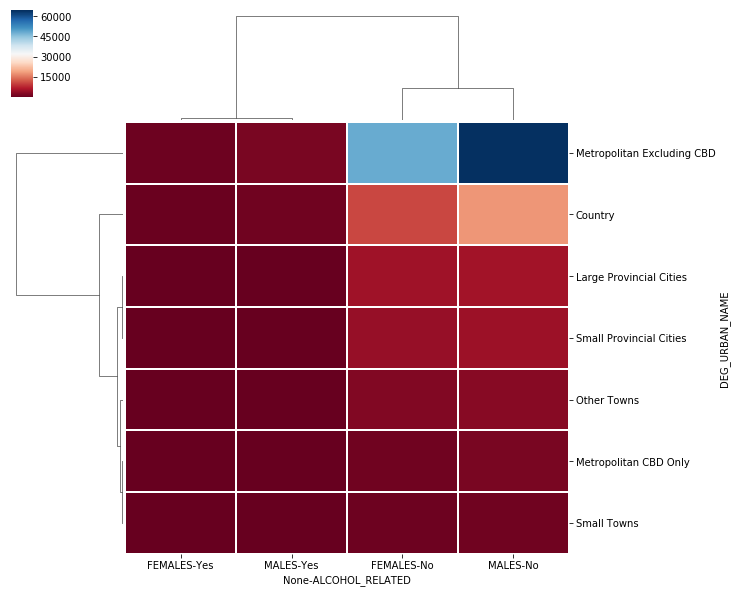

In [311]:
seaborn.clustermap(data=accidents_table, linewidths=1, cmap='RdBu')

## The Pandas group-by

In [313]:
crashes_gb = crashes.groupby('DEG_URBAN_NAME')

In [314]:
crashes_gb.median()

,X,Y,OBJECTID,NODE_ID,LONGITUDE,LATITUDE,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,...,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE
DEG_URBAN_NAME,,,,,,,,,,,,,,,,,,,,,
Country,145.138221,-37.622689,2728034.5,274931.0,145.138220,-37.622690,2.512227e+06,2.430121e+06,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
Large Provincial Cities,144.310816,-37.598984,2727281.0,72367.0,144.310815,-37.598985,2.438883e+06,2.432910e+06,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
Metropolitan CBD Only,144.962708,-37.814248,2724032.0,65799.0,144.962710,-37.814250,2.496716e+06,2.409641e+06,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
Metropolitan Excluding CBD,145.028331,-37.828741,2726239.0,243666.0,145.028330,-37.828740,2.502490e+06,2.408026e+06,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
Other Towns,145.034967,-37.471133,2726277.5,260430.0,145.034965,-37.471130,2.503121e+06,2.447644e+06,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
Small Provincial Cities,145.357488,-37.686268,2726604.0,253531.0,145.357490,-37.686270,2.532069e+06,2.423750e+06,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
Small Towns,145.272157,-37.643529,2726258.0,272770.0,145.272160,-37.643530,2.524031e+06,2.427787e+06,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [315]:
abalone = pd.read_csv('Data/abalone.csv')

### Excersie: groupby by more than one column (sex and ring), and calculate the `mean` of every column

In [317]:
abalone_gb = abalone.groupby(['sex', 'rings'])

In [318]:
abalone_gb.mean()

Unnamed: 0    length  diameter    height  whole weight  \
sex rings                                                            
F   5      1352.000000  0.323750  0.241250  0.080000      0.162250   
    6      1993.187500  0.462812  0.349062  0.116875      0.559594   
    7      2099.431818  0.467841  0.363864  0.123068      0.592727   
    8      2056.245902  0.538033  0.418238  0.148279      0.812279   
    9      2179.109244  0.574601  0.447899  0.151807      0.982050   
    10     2106.064516  0.582278  0.456512  0.156855      1.055706   
    11     2188.875000  0.613700  0.482650  0.166050      1.216512   
    12     2008.562500  0.594922  0.467813  0.163242      1.114242   
    13     2121.954545  0.581477  0.460682  0.161307      1.074295   
    14     2006.750000  0.596071  0.475268  0.171250      1.147777   
    15     1877.926829  0.580854  0.461220  0.164146      1.051488   
    16     1472.366667  0.592833  0.476500  0.169667      1.184950   
    17     1428.076923  0.595192  0.471154  0.170769      1.174558   
    18     1959.736842  0.609474  0.482368  0.175000      1.228053   
    19     1121.200000  0.611000  0.488333  0.174000      1.238400   
    20     1087.750000  0.611667  0.488750  0.175833      1.314917   
    21     1858.428571  0.617143  0.472857  0.167143      1.266357   
    22      432.000000  0.581667  0.456667  0.188333      1.095833   
    23     1134.166667  0.588333  0.466667  0.178333      1.218833   
    24     3149.000000  0.700000  0.540000  0.215000      1.978000   
    25     2201.000000  0.645000  0.490000  0.215000      1.406000   
    27     2209.000000  0.550000  0.465000  0.180000      1.212500   
    29      480.000000  0.700000  0.585000  0.185000      1.807500   
I   1       236.000000  0.075000  0.055000  0.010000      0.002000   
    2       719.000000  0.150000  0.100000  0.025000      0.015000   
    3      1708.166667  0.174583  0.128750  0.040417      0.029083   
    4      2015.313725  0.221275  0.161667  0.053529      0.059843   
    5      1933.540000  0.287300  0.211550  0.069750      0.126930   
    6      2181.222222  0.360556  0.272269  0.088773      0.244762   
    7      2050.310861  0.406404  0.307659  0.100243      0.329766   
...                ...       ...       ...       ...           ...   
    16     2274.142857  0.537143  0.415000  0.164286      0.863714   
    17     2507.714286  0.587143  0.462857  0.167143      1.088143   
    18      628.800000  0.547000  0.435000  0.163000      0.993400   
    19     2289.000000  0.485000  0.372500  0.130000      0.572250   
    20     1944.500000  0.555000  0.432500  0.177500      0.965000   
    21      628.000000  0.530000  0.415000  0.145000      0.944000   
M   3      1139.000000  0.181667  0.128333  0.046667      0.025667   
    4      1567.000000  0.223333  0.160833  0.057500      0.057583   
    5      1807.454545  0.257727  0.191818  0.067727      0.099136   
    6      1809.296296  0.384444  0.290000  0.100926      0.330741   
    7      1860.250000  0.449000  0.344563  0.115437      0.515631   
    8      2135.837209  0.524942  0.407500  0.134506      0.766651   
    9      2161.733813  0.550683  0.429658  0.144442      0.898867   
    10     2187.295918  0.581956  0.455000  0.157381      1.059099   
    11     2349.617778  0.605667  0.476333  0.163222      1.189973   
    12     1952.711864  0.595720  0.467669  0.162500      1.157898   
    13     1963.252747  0.592912  0.466209  0.165824      1.169434   
    14     1676.107143  0.578214  0.454911  0.160179      1.101991   
    15     1352.750000  0.578462  0.457788  0.161635      1.071385   
    16     2181.966667  0.594000  0.472833  0.175833      1.144750   
    17     1668.920000  0.611000  0.483200  0.179200      1.337420   
    18     1993.666667  0.595556  0.469722  0.170278      1.214556   
    19     1945.200000  0.595000  0.466333  0.172000      1.174467   
    20     1563.166667  0.603750  0.484167  0.171250      1.236375   
    21      704.666667

# Time series data in Pandas

In [325]:
crashes['ACCIDENT_DATE'].dtype

dtype('O')

In [328]:
pd.to_datetime(crashes["ACCIDENT_DATE"], dayfirst = True)

0       2012-05-26
1       2012-06-06
2       2012-05-24
3       2012-06-06
4       2012-05-22
5       2012-06-06
6       2012-06-06
7       2012-06-06
8       2012-06-05
9       2012-06-06
10      2012-06-06
11      2012-06-11
12      2012-06-12
13      2012-01-07
14      2012-06-10
15      2012-06-12
16      2012-06-12
17      2012-06-07
18      2012-03-19
19      2012-05-21
20      2012-06-12
21      2012-06-12
22      2012-06-12
23      2012-06-10
24      2012-06-18
25      2012-06-19
26      2012-06-19
27      2012-06-19
28      2012-06-19
29      2012-06-19
           ...    
76421   2017-05-15
76422   2017-05-01
76423   2017-05-15
76424   2017-05-15
76425   2017-05-15
76426   2017-05-14
76427   2017-05-15
76428   2017-05-15
76429   2017-05-15
76430   2017-05-15
76431   2017-05-15
76432   2017-05-15
76433   2017-05-22
76434   2017-05-22
76435   2017-05-22
76436   2017-05-22
76437   2017-05-22
76438   2017-05-22
76439   2017-04-15
76440   2017-05-22
76441   2017-05-21
76442   2017

In [329]:
crashes = crashes.set_index(pd.to_datetime(crashes["ACCIDENT_DATE"], dayfirst = True))

In [330]:
crashes

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
ACCIDENT_DATE,,,,,,,,,,,,,,,,,,,,,
2012-05-26,145.060690,-37.810373,2693452,T20120013207,ABS to receive accident,Finished,26/5/2012,11.40.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,BOROONDARA,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2012-06-06,144.991172,-37.883157,2693453,T20120013209,ABS to receive accident,Finished,6/6/2012,15.40.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
2012-05-24,145.009458,-37.826952,2693454,T20120013212,ABS to receive accident,Finished,24/5/2012,09.00.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,YARRA,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
2012-06-06,145.134597,-37.841546,2693455,T20120013213,ABS to receive accident,Finished,6/6/2012,17.02.00,No,Struck Pedestrian,...,Metropolitan Excluding CBD,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
2012-05-22,145.294599,-37.888597,2693456,T20120013219,ABS to receive accident,Finished,22/5/2012,16.30.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,KNOX,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Highway,"Arterial Highway,Local Road,Arterial Other",Undivided,Undivided,Metro
2012-06-06,146.277090,-38.183242,2693457,T20120013221,ABS to receive accident,Finished,6/6/2012,18.15.00,Yes,Collision with vehicle,...,"Small Provincial Cities,Country",LATROBE,"EASTERN REGION,EASTERN REGION",C,C,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Country
2012-06-06,145.008044,-37.783915,2693458,T20120013223,ABS to receive accident,Finished,6/6/2012,18.30.00,Yes,Struck Pedestrian,...,Metropolitan Excluding CBD,"YARRA,DAREBIN",METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2012-06-06,145.125165,-37.659316,2693459,T20120013224,ABS to receive accident,Finished,6/6/2012,15.00.00,No,Collision with vehicle,...,Country,NILLUMBIK,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2012-06-05,145.211209,-37.982088,2693460,T20120013225,ABS to receive accident,Finished,5/6/2012,17.30.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,DANDENONG,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Highway,"Arterial Highway,Local Road",Undivided,Undivided,Metro


In [331]:
crashes = crashes.sort_index()

In [332]:
crashes

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
ACCIDENT_DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,144.877550,-38.367171,2688487,T20120000046,ABS to receive accident,Finished,1/1/2012,16.25.00,Yes,Struck Pedestrian,...,Metropolitan Excluding CBD,MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
2012-01-01,145.747238,-38.444933,2688491,T20120000056,ABS to receive accident,Finished,1/1/2012,16.15.00,Yes,Collision with a fixed object,...,Country,SOUTH GIPPSLAND,"EASTERN REGION,EASTERN REGION",NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
2012-01-01,145.287317,-37.832098,2688501,T20120000082,ABS to receive accident,Finished,1/1/2012,08.15.00,Yes,Collision with vehicle,...,Metropolitan Excluding CBD,MAROONDAH,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
2012-01-01,145.288358,-38.121465,2688485,T20120000043,ABS to receive accident,Finished,1/1/2012,00.45.00,Yes,Collision with vehicle,...,Metropolitan Excluding CBD,CASEY,METROPOLITAN SOUTH EAST REGION,M,M,Arterial Highway,Arterial Highway,Undivided,Undivided,Metro
2012-01-01,142.502841,-38.374192,2688488,T20120000050,ABS to receive accident,Finished,1/1/2012,15.00.00,No,Collision with a fixed object,...,Small Provincial Cities,WARRNAMBOOL,SOUTH WESTERN REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
2012-01-01,145.599868,-38.656543,2691460,T20120005091,ABS to receive accident,Finished,1/1/2012,15.30.00,No,Collision with a fixed object,...,Country,BASS COAST,"EASTERN REGION,EASTERN REGION",NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
2012-01-01,144.739749,-37.873671,2688494,T20120000060,ABS to receive accident,Finished,1/1/2012,19.40.00,Yes,Vehicle overturned (no collision),...,Metropolitan Excluding CBD,WYNDHAM,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
2012-01-01,145.142676,-37.979908,2688489,T20120000053,ABS to receive accident,Finished,1/1/2012,16.50.00,Yes,Collision with vehicle,...,Metropolitan Excluding CBD,KINGSTON,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
2012-01-01,144.953222,-37.841733,2688484,T20120000032,ABS to receive accident,Finished,1/1/2012,00.55.00,Yes,Struck Pedestrian,...,Metropolitan Excluding CBD,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro


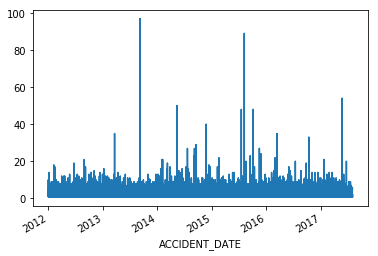

In [334]:
crashes['TOTAL_PERSONS'].plot()

In [335]:
crashes.loc['2017']

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
ACCIDENT_DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,146.788709,-36.320820,2757482,T20170000120,ABS to receive accident,Finished,1/1/2017,08.30.00,Yes,No collision and no object struck,...,Country,INDIGO,NORTH EASTERN REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
2017-01-01,144.718221,-37.857404,2757278,T20170000003,ABS to receive accident,Finished,1/1/2017,00.30.00,No,Collision with a fixed object,...,Metropolitan Excluding CBD,WYNDHAM,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
2017-01-01,144.319991,-38.307779,2759871,T20170001364,ABS to receive accident,Finished,1/1/2017,14.30.00,No,Collision with vehicle,...,Country,SURF COAST,SOUTH WESTERN REGION,B,B,Arterial Highway,"Arterial Highway,Local Road",Undivided,Undivided,Country
2017-01-01,145.136220,-37.858093,2757581,T20170000049,ABS to receive accident,Finished,1/1/2017,11.53.00,No,Collision with a fixed object,...,Metropolitan Excluding CBD,"WHITEHORSE,MONASH",METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
2017-01-01,146.296873,-36.348450,2761736,T20170004859,ABS to receive accident,Finished,1/1/2017,01.10.00,Yes,No collision and no object struck,...,Small Provincial Cities,WANGARATTA,NORTH EASTERN REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
2017-01-01,145.229688,-37.963112,2757423,T20170000009,ABS to receive accident,Finished,1/1/2017,02.40.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,DANDENONG,METROPOLITAN SOUTH EAST REGION,M,M,Freeway,Freeway,Undivided,Undivided,Metro
2017-01-01,145.060964,-38.352698,2757424,T20170000011,ABS to receive accident,Finished,1/1/2017,04.50.00,No,Collision with a fixed object,...,Country,MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,C,C,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2017-01-01,144.893680,-37.837875,2757575,T20170000036,ABS to receive accident,Finished,1/1/2017,00.15.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,HOBSONS BAY,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2017-01-01,145.240173,-37.983738,2757422,T20170000008,ABS to receive accident,Finished,1/1/2017,01.30.00,Yes,No collision and no object struck,...,Metropolitan Excluding CBD,CASEY,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro


In [336]:
crashes.loc['2017-01']

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
ACCIDENT_DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,146.788709,-36.320820,2757482,T20170000120,ABS to receive accident,Finished,1/1/2017,08.30.00,Yes,No collision and no object struck,...,Country,INDIGO,NORTH EASTERN REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
2017-01-01,144.718221,-37.857404,2757278,T20170000003,ABS to receive accident,Finished,1/1/2017,00.30.00,No,Collision with a fixed object,...,Metropolitan Excluding CBD,WYNDHAM,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
2017-01-01,144.319991,-38.307779,2759871,T20170001364,ABS to receive accident,Finished,1/1/2017,14.30.00,No,Collision with vehicle,...,Country,SURF COAST,SOUTH WESTERN REGION,B,B,Arterial Highway,"Arterial Highway,Local Road",Undivided,Undivided,Country
2017-01-01,145.136220,-37.858093,2757581,T20170000049,ABS to receive accident,Finished,1/1/2017,11.53.00,No,Collision with a fixed object,...,Metropolitan Excluding CBD,"WHITEHORSE,MONASH",METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
2017-01-01,146.296873,-36.348450,2761736,T20170004859,ABS to receive accident,Finished,1/1/2017,01.10.00,Yes,No collision and no object struck,...,Small Provincial Cities,WANGARATTA,NORTH EASTERN REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
2017-01-01,145.229688,-37.963112,2757423,T20170000009,ABS to receive accident,Finished,1/1/2017,02.40.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,DANDENONG,METROPOLITAN SOUTH EAST REGION,M,M,Freeway,Freeway,Undivided,Undivided,Metro
2017-01-01,145.060964,-38.352698,2757424,T20170000011,ABS to receive accident,Finished,1/1/2017,04.50.00,No,Collision with a fixed object,...,Country,MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,C,C,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2017-01-01,144.893680,-37.837875,2757575,T20170000036,ABS to receive accident,Finished,1/1/2017,00.15.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,HOBSONS BAY,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2017-01-01,145.240173,-37.983738,2757422,T20170000008,ABS to receive accident,Finished,1/1/2017,01.30.00,Yes,No collision and no object struck,...,Metropolitan Excluding CBD,CASEY,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro


In [337]:
crashes.loc['2017-06-01']

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
ACCIDENT_DATE,,,,,,,,,,,,,,,,,,,,,
2017-06-01,145.050786,-37.726798,2764513,T20170010795,ABS to receive accident,Finished,1/6/2017,17.05.00,No,Struck Pedestrian,...,Metropolitan Excluding CBD,DAREBIN,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
2017-06-01,145.057900,-37.746961,2764416,T20170010746,ABS to receive accident,Finished,1/6/2017,21.55.00,Yes,Collision with vehicle,...,Metropolitan Excluding CBD,BANYULE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2017-06-01,140.996817,-35.317738,2764195,T20170012151,ABS to receive accident,Finished,1/6/2017,16.20.00,No,Vehicle overturned (no collision),...,Country,MILDURA,WESTERN REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
2017-06-01,144.735880,-37.719513,2764360,T20170010709,ABS to receive accident,Finished,1/6/2017,09.16.00,No,Collision with a fixed object,...,Metropolitan Excluding CBD,MELTON,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
2017-06-01,145.259660,-38.103057,2764308,T20170010688,ABS to receive accident,Finished,1/6/2017,08.55.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,CASEY,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
2017-06-01,143.485526,-37.091343,2764319,T20170010704,ABS to receive accident,Finished,1/6/2017,13.08.00,No,Collision with a fixed object,...,Country,PYRENEES,WESTERN REGION,B,B,Arterial Highway,Arterial Highway,Undivided,Undivided,Country
2017-06-01,144.370471,-38.179426,2764318,T20170010703,ABS to receive accident,Finished,1/6/2017,10.30.00,No,Collision with vehicle,...,Large Provincial Cities,GEELONG,SOUTH WESTERN REGION,C,C,Arterial Other,Arterial Other,Undivided,Undivided,Country
2017-06-01,144.352557,-38.196788,2764317,T20170010699,ABS to receive accident,Finished,1/6/2017,07.58.00,No,Struck Pedestrian,...,Large Provincial Cities,GEELONG,SOUTH WESTERN REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
2017-06-01,145.006999,-37.679548,2764316,T20170010697,ABS to receive accident,Finished,1/6/2017,06.40.00,No,Struck Pedestrian,...,Metropolitan Excluding CBD,WHITTLESEA,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro


In [339]:
crashes.loc['2013-07':'2014-06']

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
ACCIDENT_DATE,,,,,,,,,,,,,,,,,,,,,
2013-07-01,145.231500,-37.876967,2709652,T20130017262,ABS to receive accident,Finished,1/7/2013,19.00.00,Yes,Collision with vehicle,...,Metropolitan Excluding CBD,KNOX,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2013-07-01,145.041762,-38.257066,2710579,T20130014576,ABS to receive accident,Finished,1/7/2013,13.00.00,No,No collision and no object struck,...,"Metropolitan Excluding CBD,Country",MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
2013-07-01,144.937025,-37.738151,2712141,T20130018087,ABS to receive accident,Finished,1/7/2013,15.15.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,MORELAND,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Highway,Arterial Highway,Undivided,Undivided,Metro
2013-07-01,145.263637,-38.005050,2707751,T20130013617,ABS to receive accident,Finished,1/7/2013,08.40.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,CASEY,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Highway,Arterial Highway,Undivided,Undivided,Metro
2013-07-01,146.395084,-37.972593,2707753,T20130013620,ABS to receive accident,Finished,1/7/2013,05.30.00,Yes,Collision with a fixed object,...,Country,BAW BAW,"EASTERN REGION,EASTERN REGION",C,C,Arterial Other,Arterial Other,Undivided,Undivided,Country
2013-07-01,144.875942,-37.785702,2711808,T20130018675,ABS to receive accident,Finished,1/7/2013,17.00.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,MARIBYRNONG,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
2013-07-01,143.836065,-37.526224,2707848,T20130013652,ABS to receive accident,Finished,1/7/2013,17.55.00,No,Collision with vehicle,...,Large Provincial Cities,BALLARAT,WESTERN REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
2013-07-01,145.148919,-38.101178,2707755,T20130013622,ABS to receive accident,Finished,1/7/2013,09.14.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,FRANKSTON,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
2013-07-01,145.103764,-37.084088,2707796,T20130013630,ABS to receive accident,Finished,1/7/2013,06.50.00,Yes,Vehicle overturned (no collision),...,Country,MITCHELL,NORTHERN REGION,M,M,Freeway,Freeway,Undivided,Undivided,Country


What happens when you try to answer this question: since 2012, what was the worst week for TOTALPERSONS involved in an acc.?

In [349]:
rs = crashes.resample('Y')  # resample is similar to groupby

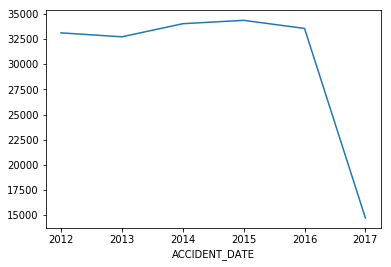

In [350]:
rs['TOTAL_PERSONS'].sum().plot()

In [351]:
results = rs['TOTAL_PERSONS'].sum()

In [352]:
results.max()

34363

In [354]:
results.idxmax()

Timestamp('2015-12-31 00:00:00', freq='A-DEC')

### Excersie: Find the worst week on Victorian roads since 2012

In [359]:
crashes_w = crashes.resample('W')

In [360]:
total_crashes_w = crashes_w['FATALITY'].sum()

In [361]:
total_crashes_w.idxmax()

Timestamp('2014-11-30 00:00:00', freq='W-SUN')

## Parsing dates when reading files

In [365]:
pd.read_csv(
    'Data/Rainfall/10010.csv',
    header = None,
    names= ['date', 'rain']
)

,date,rain
0,01/09/1930,0.000000
1,02/09/1930,0.000000
2,03/09/1930,0.000000
3,04/09/1930,0.000000
4,05/09/1930,3.063430
5,06/09/1930,1.967835
6,07/09/1930,1.090469
7,08/09/1930,0.610020
8,09/09/1930,0.346879
9,10/09/1930,0.121272


In [369]:
rainfall= pd.read_csv(
    'Data/Rainfall/10010.csv',
    header = None,
    names= ['date', 'rain'],
    parse_dates=['date'],
    dayfirst= True,
    index_col= 'date'
)

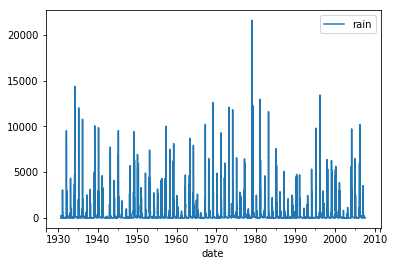

In [370]:
rainfall.plot()

In [371]:
rainfall['station']= 10010

In [372]:
rainfall

,rain,station
date,,
1930-09-01,0.000000,10010
1930-09-02,0.000000,10010
1930-09-03,0.000000,10010
1930-09-04,0.000000,10010
1930-09-05,3.063430,10010
1930-09-06,1.967835,10010
1930-09-07,1.090469,10010
1930-09-08,0.610020,10010
1930-09-09,0.346879,10010


### Exercise: parsin more dates and joining on dates

Read in one of the other stations, 10011, 10012,.... Read it in, parse the dates as above....

In [373]:
rainfall_10011 = pd.read_csv('Data/Rainfall/10011.csv',
                            header = None,
                            names= ['date', 'rain'],
                            parse_dates=['date'],
                            dayfirst= True,
                            index_col= 'date'
                            )

In [374]:
rainfall_10011['station'] = 10011

In [377]:
rainfall.join(rainfall_10011, lsuffix=' 10010', rsuffix=' 10011') # join is a bad idea for this kind of joining 

,rain 10010,station 10010,rain 10011,station 10011
date,,,,
1930-09-01,0.000000,10010,0.000000,10011
1930-09-02,0.000000,10010,0.000000,10011
1930-09-03,0.000000,10010,0.000000,10011
1930-09-04,0.000000,10010,0.570040,10011
1930-09-05,3.063430,10010,7.221712,10011
1930-09-06,1.967835,10010,4.145608,10011
1930-09-07,1.090469,10010,2.250725,10011
1930-09-08,0.610020,10010,1.090647,10011
1930-09-09,0.346879,10010,0.489856,10011


### Exercise: Build a colours scheme in Seaborn

Use the function below to creat your own diverging colour palette. Note you only need to run run the cell once to activate the controls - the value for cmapis automatically updated

In [378]:
cmap = seaborn.choose_diverging_palette(as_cmap=True)

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

To test this, use:

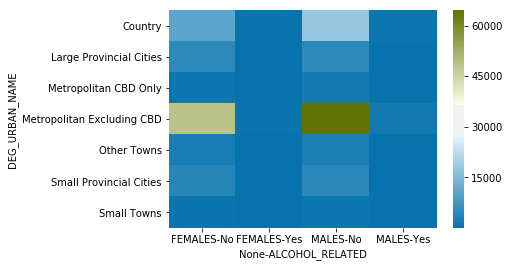

In [385]:
seaborn.heatmap(accidents_table,
                cmap=cmap
                )